Морфология - важная дисциплина внутри лингвистики. Хотя исследование граммем может показаться для людей, не связанных с лингвистикой, многие вещи, связанные с морфологическим анализом, полезны для широкого спектра людей: особенно такие практики как **стемминг**, **лемматизация** и разметка **частей речи** (*POS-tagging*).  
Одной из ключевых задач простой компьютерной морфологии является подготовка данных таким образом, чтобы в них не было чрезмерной вариативности одного и того же слова (очевидный пример - разнообразие падежных форм в русском языке). Для подсчетов частот, извлечения ключевых слов, построения тематичеких моделей, облаков слов и т.д. очень полезно уметь привести весь текст к единообразному виду. Для этого и нужны **стемминг** и **лемматизация**. Разберем оба вида подробнее.

**Стемминг** - процесс отсечения суффиков (достаточно условный) по своим определенным правилам. Рассмотрим простейший стемминг на примере английского языка.

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer #собственно говоря, это стеммер, который нам нужен для отсечения суффиксов
ps = PorterStemmer()

In [ ]:
text = 'John really loves all those fluffy kittens!'
tokens = word_tokenize(text)
for token in tokens:
    token_stem = ps.stem(token)
    print(token_stem)  

**Задание 1 (на повторение списков и их методов в том числе).** Измените предыдущий код так, чтобы программа распечатала новую строку, в которой будут не изначальные формы, а объединенные в строку обработанные стемы.

Посмотрим на один классический пример:

In [ ]:
text = 'Programmers program with programming languages'
tokens = word_tokenize(text)
for token in tokens:
    token_stem = ps.stem(token)
    print(token_stem)  

**Вопрос.** В чем недостаток такого аутпута?

Что будет, если применить стеммер Портера на русском языке?

In [ ]:
text = 'Джон очень любит пушистых котят!'
tokens = word_tokenize(text)
for token in tokens:
    token_stem = ps.stem(token)
    print(token_stem)  

Увы, он работает только с английским языком. Для крупных языков есть другие решения. Например, в nltk есть SnowballStemmer.

In [ ]:
from nltk.stem import SnowballStemmer
print(" ".join(SnowballStemmer.languages)) #посмотрим, для каких языков есть решения

Проверим некоторые из них:

In [ ]:
ger_stemmer = SnowballStemmer('german')
rus_stemmer = SnowballStemmer('russian')

In [ ]:
text = 'Ich habe es schon gemacht, mein lieber Freund!'
tokens = word_tokenize(text)
for token in tokens:
    token_stem = ger_stemmer.stem(token)
    print(token_stem)  

In [ ]:
text = 'Я уже все это сделал, дайте мне отдохнуть, дорогие коллеги!'
tokens = word_tokenize(text)
for token in tokens:
    token_stem = rus_stemmer.stem(token)
    print(token_stem)  

**Задание 2.** Выберите любой из оставшихся языков и проверьте, как на нем работает SnowballStemmer.

In [ ]:
#cделано

Поработаем снова с письмами Достоевского.

In [ ]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
stopwords_ru = stopwords.words('russian')

In [ ]:
path = 'C:\\Users\\Aleksandr\\DostoyevskiEpistola.txt'
with open(path, encoding='utf-8') as txt:
  text = txt.read()
  text = re.sub('[^а-яА-ЯёЁ -]', '', text.lower())
  text_no_stop = ' '.join([token for token in word_tokenize(text) if token not in stopwords_ru])
print(len(text_no_stop.split())) #количество токенов после очистки от стоп-слов
print(len(set(text_no_stop.split()))) #количество типов в тексте

А теперь возьмем этот же текст и обработаем его стеммером, чтобы увидеть количество типов стем.

In [ ]:
tokens = word_tokenize(text_no_stop)
stemmed_tokens = []
for token in tokens:
    token_stem = rus_stemmer.stem(token)
    stemmed_tokens.append(token_stem)
stemmed_epistola = ' '.join(stemmed_tokens)
print(len(stemmed_epistola.split())) #количество токенов после очистки от стоп-слов
print(len(set(stemmed_epistola.split()))) #количество типов в тексте

**NB!** Для тех, кто хочет освиваться с list comprehensions, аналогом кода с циклом выше будут следующие строчки:

In [ ]:
stemmed_tokens = [rus_stemmer.stem(token) for token in word_tokenize(text_no_stop)]
print(len(stemmed_epistola.split())) #количество токенов после очистки от стоп-слов
print(len(set(stemmed_epistola.split()))) #количество типов в тексте

Разница налицо: мы заметно уменьшили количество уникальных типов слов, объединив многие из разных словоформ в один стем.  
Стемминг очень эффективен для аналитических языков вроде английского с не слишком разнообразным словооизменением. Он быстр (намного быстрее лемматизации) и справляется с необходимостью снизить вариативность словоформ в тексте, однако неоптимален для языков с большим разнообразием словоформ.

**Задание 3.** Выберите любой текст. Сравните количество типов в необработанном тексте и после стемминга (т.е. посчитать количество уникальных типов токенов и уникальных типов стемов).

**Лемматизация** - это процесс приведения к начальной форме слова (**лемме**). Например, у токена "лопатой" леммой является форма "лопата".

Лемматизация учитывает часть речи и сочетания с другими словами, т.е. старается учесть контекст - в отличие от стемминга, который строится на простых правилах (именно поэтому стемминг намного быстрее леммматизации). Она упрощает поиск ключевых слов, анализ текстовых данных и особенно важна при подготовке текстовых данных к кластерному анализу и тематическому моделированию.

Разберем несколько вариантов лемматизаций для русского и других языков.

Одним из самых точных и быстрых решений для русского языка будет модуль **pymorphy3**. Он быстрее многих своих конкурентов и достаточно точен, хотя и не учитывает контекст, т.е. не умеет снимать омонимию самостоятельно.

In [ ]:
!pip install pymorphy3

In [ ]:
from pymorphy3 import MorphAnalyzer #загрузим анализатор
morph = MorphAnalyzer() #сохраним его в переменную, чтобы заработал

Теперь мы можем легко получить все варианты разбора слова. Например, рассмотрим неоднозначное слово "стекла" и его варианты разбора.

In [ ]:
word = morph.parse('cтекла') #получим все варианты разбора
word

**Задание 4**. Придумайте свое неоднозначное слово и получите его разбор.

На самом деле, работая с большим массивом данных с помощью pymorphy, нет почти никогда большой необходимости брать менее вероятные варианты разбора. Если вы хотите получать только наиболее вероятный разбор (т.е. наиболее часто встретившийся в обучающем корпусе), то нужно применить нехитрый трюк со срезом:

In [ ]:
word = morph.parse('cтекла')[0] #получим самый вероятный вариант разбора
word

Но нас в первую очередь сейчас интересует только начальная форма. Получим её следующим образом:

In [ ]:
word_lemma = morph.parse('cтекла')[0].normal_form
word_lemma

Теперь мы можем обрабатывать целые тексты, получая начальные формы.

In [ ]:
text_1 = 'Мой дядя самых честных правил, Когда не в шутку занемог, Он уважать себя заставил И лучше выдумать не мог. Его пример другим наука; Но, боже мой, какая скука С больным сидеть и день и ночь, Не отходя ни шагу прочь! Какое низкое коварство Полуживого забавлять, Ему подушки поправлять, Печально подносить лекарство, Вздыхать и думать про себя: Когда же чёрт возьмёт тебя?'
text_2 = 'Глокая куздра штеко будланула бокра и курдячит бокренка'
text_3 = 'Из чапыги с фырканьем вынырнули два зайца и, взрывая снег,  побежали  к межам. Под коленкоровой дороге скрипел обоз; под обротями трепыхались вяхири, и лошади, кинув жвачку, напрянули уши.'
lemm_tokens = []
for token in word_tokenize(text_3.lower()):
    token_lemma = morph.parse(token)[0].normal_form
    lemm_tokens.append(token_lemma)
lemmatized_text = ' '.join(lemm_tokens)
print(lemmatized_text)

**Задание 5.** Выберите любой короткий текст на русском языке и лемматизируйте его. Проверьте разбор: есть ли неправильные результаты?

Давайте ещё раз поработаем с Достоевским и посмотрим на количество уникальных лемм.

In [ ]:
lemm_tok_epistola = []
for token in word_tokenize(text_no_stop):
    token_lemma = morph.parse(token)[0].normal_form
    lemm_tok_epistola.append(token_lemma)
lemmatized_epistola = ' '.join(lemm_tok_epistola)

print(len(set(lemm_tok_epistola)))

In [ ]:
lemmatized_epistola[:100]

**Задание 6.** Вернитесь к тексту, который вы сравнивали по количеству типов в обычном виде и в виде стемов. Какое количество уникальных лемм в нем?

Другой эффективный инструмент разметки русского языка - это **mystem.**

In [ ]:
! pip install PyMystem3

In [ ]:
from pymystem3 import Mystem
morph = Mystem()

В отличие от pymorphy3 Майстем умеет самостоятельно снимать омономию и токенизировать, т.е. токенизация из nltk в этом случае не понадобится.

In [ ]:
text = 'Мой дядя самых честных правил, Когда не в шутку занемог, Он уважать себя заставил И лучше выдумать не мог. Его пример другим наука; Но, боже мой, какая скука С больным сидеть и день и ночь, Не отходя ни шагу прочь! Какое низкое коварство Полуживого забавлять, Ему подушки поправлять, Печально подносить лекарство, Вздыхать и думать про себя: Когда же чёрт возьмёт тебя?'
text_mystem = morph.analyze(text)
# Вот, что у нас получилось
text_mystem

In [ ]:
text = 'Не кури, турка, трубку, купи лучше кипу пик, лучше пик кипу купи'
text_mystem = morph.analyze(text)
# Вот, что у нас получилось
text_mystem

Результатом является список словарей с разборами каждого слова. Это позволяет относительно легко получать ту или иную информацию о слове. Сейчас нас интересует лемматизация, достанем леммы.

In [ ]:
print('Начальная форма слова:', text_mystem[4]['analysis'][0]['lex']) #лемма
#в целом получение леммы очень похоже на то, что в пайморфи, просто вам нужно обращаться немного иначе. 
#вы пишете сначала название переменной, куда сохранен разбор text_mystem, затем индекс слова в строке (например, [4]),
#затем указываете, что хотите получить разбор (['analysis']), следующий индекс [0] говорит, что надо вернуть самый вероятный
#разбор, а ['lex'] указывает на тип разбора - в этом случае лемма

Как получить весь разобранный текст? На самом деле здесь уже не нужно получать все разборы и отдельные элементы, как раньше: в майстеме есть специальные функции для этого.

In [ ]:
lemmas = morph.lemmatize(text)
lemmas_no_spaces = []
for lemma in lemmas:
    if lemma != ' ':
        lemmas_no_spaces.append(lemma)
print(lemmas_no_spaces)

#то же самое, только кратко
lemmas_no_spaces_short = [lemma for lemma in lemmas if lemma != ' ']
print(lemmas_no_spaces_short)
print(lemmas_no_spaces == lemmas_no_spaces_short)

И склеим в текст:

In [ ]:
print(''.join(lemmas))

**Задание 7.** Лемматизируйте текст из заданий 3 и 6 с помощью майстема. Есть ли разница в количество уникальных типов?

Для множества других языков (хотя и включая русский) можно использовать большую и самую мощную библиотеку **stanza.**

In [ ]:
! pip install stanza

In [ ]:
import stanza
stanza.download("ru")
nlp_stanza = stanza.Pipeline(lang="ru", processors="tokenize, pos, lemma")

In [ ]:
text = 'Мой дядя самых честных правил, Когда не в шутку занемог, Он уважать себя заставил И лучше выдумать не мог. Его пример другим наука; Но, боже мой, какая скука С больным сидеть и день и ночь, Не отходя ни шагу прочь! Какое низкое коварство Полуживого забавлять, Ему подушки поправлять, Печально подносить лекарство, Вздыхать и думать про себя: Когда же чёрт возьмёт тебя?'
text_stanza = nlp_stanza(text)
print(text_stanza) #результат

Как вы видите, результат - это снова список словарей, удобный для работы. Если присмотреться, то внутрь списка вложены не словари слов, а сначала - другие списки. Это списки, содержащие целое предложение. Мы также можем работать с каждым словом по отдельности: 

In [ ]:
word_stanza = text_stanza.sentences[0].words[3]
print(word_stanza)

Так как это словарь, можно обращаться к ключам:

In [ ]:
word_stanza.lemma

In [ ]:
text = 'Мой дядя самых честных правил, Когда не в шутку занемог, Он уважать себя заставил И лучше выдумать не мог. Его пример другим наука; Но, боже мой, какая скука С больным сидеть и день и ночь, Не отходя ни шагу прочь! Какое низкое коварство Полуживого забавлять, Ему подушки поправлять, Печально подносить лекарство, Вздыхать и думать про себя: Когда же чёрт возьмёт тебя?'
lemmas = []
text_stanza = nlp_stanza(text) #обрабатываем текст 
for sentence in text_stanza.iter_tokens(): #iter_tokens позволяет итерироваться по этому объекту
    for token in sentence.words: #обращаемся к словам\
        print(token.lemma) #получаем лемму из словаря
        lemmas.append(token.lemma)

In [ ]:
print(' '.join(lemmas))

**Задание 8.** Лемматизируйте текст из заданий 3, 6 и 7 с помощью stanza. Есть ли разница в количество уникальных типов?

**Облака слов** благодаря лемматизации тоже становятся более информативными.

In [ ]:
path = 'C:\\Users\\Aleksandr\\DostoyevskiEpistola.txt'
with open(path, encoding='utf-8') as txt:
    text = txt.read()
    text = re.sub('[^а-яА-ЯёЁ -]', '', text[:50000].lower())
    text_no_stop = ' '.join([token for token in word_tokenize(text) if token not in stopwords_ru])

In [ ]:
lemmas = []
text_stanza = nlp_stanza(text_no_stop) #обрабатываем текст 
for sentence in text_stanza.iter_tokens(): #iter_tokens позволяет итерироваться по этому объекту
    for token in sentence.words: #обращаемся к словам
        lemmas.append(token.lemma)
lemmatized_epistolas_stanza = ' '.join(lemmas)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Отрисуем облако слов до лемматизации:

In [ ]:
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(text_no_stop)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

И после:

In [ ]:
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(lemmatized_epistolas_stanza)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Все ещё, конечно, не так информативно, как могло бы быть: слишком разные части речи на одном графике отвлекают внимание.

**Частеречная разметка.**

Морфологические инструменты не исчерпываются простым определением начальных форм или стемов. Более того, продвинутые парсеры одновременно предсказывают и часть речи и её начальную форму. Мы можем этим пользоваться, чтобы получать информацию по частям речи в тексте.

Например, с помощью **pymorphy**:

In [ ]:
from pymorphy3 import MorphAnalyzer #загрузим анализатор
morph = MorphAnalyzer() #сохраним его в переменную, чтобы заработал

In [ ]:
word_lemma = morph.parse('капуста')
word_lemma

Получим набор граммем для этого слова:

In [ ]:
word_lemma = morph.parse('капуста')[0].tag
word_lemma

Извлечем граммемы по отдельности:

In [ ]:
word_lemma = morph.parse('капуста')[0]
word_lemma.tag

**Часть речи:**

In [ ]:
word_lemma.tag.POS

**Одушевленность:**

In [ ]:
word_lemma.tag.animacy

**Пол:**

In [ ]:
word_lemma.tag.gender

**Число:**

In [ ]:
word_lemma.tag.number

**Падеж:**

In [ ]:
word_lemma.tag.case

Список возможных граммем (включая другие части речи):

**POS**           # Part of Speech, часть речи  
**animacy**       # одушевленность  
**aspect**        # вид: совершенный или несовершенный  
**case**          # падеж  
**gender**        # род (мужской, женский, средний)  
**involvement**   # включенность говорящего в действие  
**mood**          # наклонение (повелительное, изъявительное)  
**number**        # число (единственное, множественное)  
**person**        # лицо (1, 2, 3)  
**tense**         # время (настоящее, прошедшее, будущее)  
**transitivity**  # переходность (переходный, непереходный)  
**voice**         # залог (действительный, страдательный)

Список частеречных тэгов:

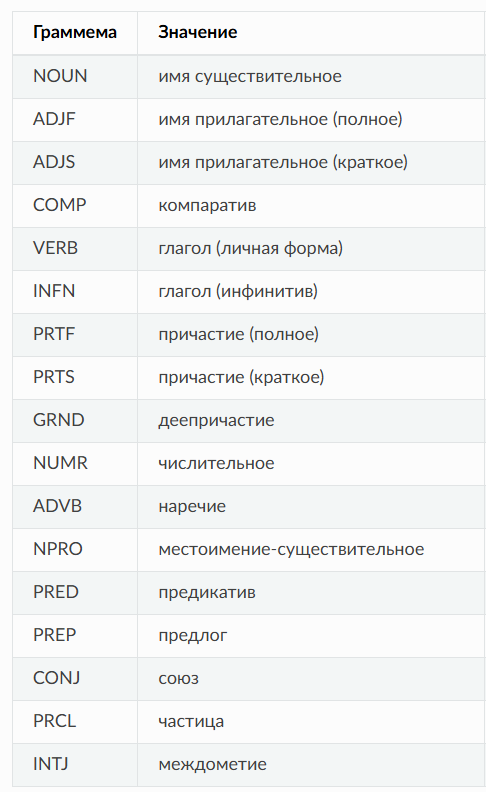

Список падежей:

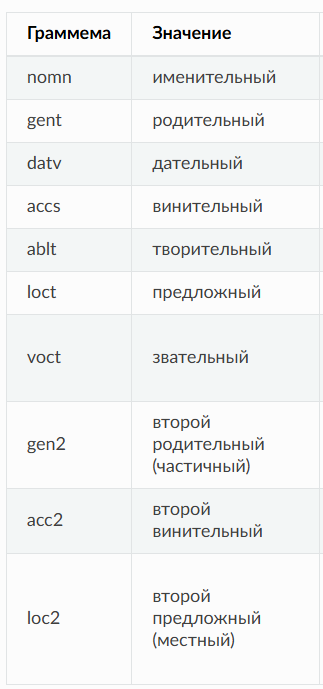

In [ ]:
word_lemma = morph.parse('копить')[0]
word_lemma.tag.transitivity

Таким образом мы можем отбирать токены, которые удовлетворяют нашему грамматическому запросу. Вернемся к письмам Достоевского. Давайте для начала отрисуем графики облаков слов для **существительных**.

In [ ]:
path = 'C:\\Users\\Aleksandr\\DostoyevskiEpistola.txt'
with open(path, encoding='utf-8') as txt:
    text = txt.read()
    text = re.sub('\n', ' ', text[150000:200000].lower())
    text = re.sub('[^а-яА-ЯёЁ -]', '', text.lower())
    text_no_stop = ' '.join([token for token in word_tokenize(text) if token not in stopwords_ru])

In [ ]:
text_no_stop

Напишем простой цикл с условием, который будет писать 'yay', если встреченное слово является существительным, и 'nay', если это что-то другое.

In [ ]:
for token in text_no_stop[:1000].split(): #будем проверять каждое слово отдельно по очереди
    if morph.parse(token)[0].tag.POS == 'NOUN':
        print('yay')
    else:
        print('nay')

**Задание 9**. Напишите цикл, который пройдется по тексту и будет распечатывать следующее:  
1) "Это существительное", если токен имеет тэг NOUN;
2) "Это глагол", если токен имеет тэг VERB;
3) "Это прилагательное", если токен имеет тэг ADJF или ADJS;
4) "Это другое", во всех остальных случаях.

Продолжим нашу задачу с отрисовкой графика:

In [ ]:
list_of_nouns = [] #сюда мы сохраним все существительные из писем Достоевского
for token in text_no_stop.split(): #будем проверять каждое слово отдельно по очереди
    word_parsed = morph.parse(token)[0]
    if word_parsed.tag.POS == 'NOUN': #проверяем существительные
        list_of_nouns.append(word_parsed.normal_form) #сохраняем их в отдельный список
only_nouns = ' '.join(list_of_nouns) #создаём из списка строку
only_nouns

Теперь отрисуем облако слов по существительным:

In [ ]:
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(only_nouns)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Задание 10.** Отрисуйте облака слов по прилагательным.

**Задание 11 (с маленькой звездочкой).** Отрисуйте облака слов по глаголам прошедшего времени.

In [ ]:
word_parsed = morph.parse('откопала')[0]
word_parsed

При желании можно сохранить описания текстов в табличном виде и сохранить, например, определенную статистику.

In [ ]:
import pandas as pd

Можно использовать несколько топорный, но эффективный подход, например: 

In [ ]:
lemmas = [] #сюда мы сохраним леммы
pos_tags = [] #cюда мы сохраним части речи
text = 'Мой дядя самых честных правил, Когда не в шутку занемог, Он уважать себя заставил И лучше выдумать не мог. Его пример другим наука; Но, боже мой, какая скука С больным сидеть и день и ночь, Не отходя ни шагу прочь! Какое низкое коварство Полуживого забавлять, Ему подушки поправлять, Печально подносить лекарство, Вздыхать и думать про себя: Когда же чёрт возьмёт тебя?'
for token in word_tokenize(text.lower()): #пройдем по каждому токену
    word_parsed = morph.parse(token)[0] #получим самый вероятный разбор
    lemmas.append(word_parsed.normal_form) #cохраним лемму в список лемм
    pos_tags.append(word_parsed.tag.POS) #сохраним тэг в список тэгов

print(lemmas)
print(pos_tags)

In [ ]:
df = pd.DataFrame({'original_text': [text],
                   'lemmatized_text': [' '.join(lemmas)], #объединим список лем в текст
                   'number_of_words': [len(text.split())], #посчитаем количество слов
                   'number_of_types': [len(set(text.split()))]}) #посчитаем количество типов
df

Если у нас несколько текстов, то можно поступить так:

In [ ]:
onegin_one_two = ['Мой дядя самых честных правил, Когда не в шутку занемог, Он уважать себя заставил И лучше выдумать не мог. Его пример другим наука; Но, боже мой, какая скука С больным сидеть и день и ночь, Не отходя ни шагу прочь! Какое низкое коварство Полуживого забавлять, Ему подушки поправлять, Печально подносить лекарство, Вздыхать и думать про себя: Когда же чёрт возьмёт тебя?', 'Увы, на разные забавы Я много жизни погубил! Но если б не страдали нравы, Я балы б до сих пор любил. Люблю я бешеную младость, И тесноту, и блеск, и радость, И дам обдуманный наряд; Люблю их ножки; только вряд Найдете вы в России целой Три пары стройных женских ног. Ах! долго я забыть не мог Две ножки... Грустный, охладелый, Я всё их помню, и во сне Они тревожат сердце мне.']
print(len(onegin_one_two))

In [ ]:
onegin_one_two = ['Мой дядя самых честных правил, Когда не в шутку занемог, Он уважать себя заставил И лучше выдумать не мог. Его пример другим наука; Но, боже мой, какая скука С больным сидеть и день и ночь, Не отходя ни шагу прочь! Какое низкое коварство Полуживого забавлять, Ему подушки поправлять, Печально подносить лекарство, Вздыхать и думать про себя: Когда же чёрт возьмёт тебя?', 'Увы, на разные забавы Я много жизни погубил! Но если б не страдали нравы, Я балы б до сих пор любил. Люблю я бешеную младость, И тесноту, и блеск, и радость, И дам обдуманный наряд; Люблю их ножки; только вряд Найдете вы в России целой Три пары стройных женских ног. Ах! долго я забыть не мог Две ножки... Грустный, охладелый, Я всё их помню, и во сне Они тревожат сердце мне.']
lemmatized_texts_corpus_level = [] #здесь сохранятся отдельные списки лемм для каждого текста (уровень корпуса)
pos_tags_corpus_level = [] #здесь сохранятся отдельные списки тэгов для каждого текста (уровень корпуса)

for text in onegin_one_two: #проходимся по текстам
    lemmas_text_text_level = [] #cписок лемм на уровне текста
    pos_tags_text_level = [] #cписок тэгов на уровне текста
    for token in word_tokenize(text.lower()): #проходимся по тэгам в корпусе
        word_parsed = morph.parse(token)[0] #получаем самый вероятный разбор
        lemmas_text_text_level.append(word_parsed.normal_form) #получаем лемму
        pos_tags_text_level.append(word_parsed.tag.POS) #получаем частеречный тэг
    lemmatized_texts_corpus_level.append(' '.join(lemmas_text_text_level)) #сохраняем в список лемматизированных текстов на уровне корпуса
    pos_tags_corpus_level.append(pos_tags_text_level) #сохраняем тэги на уровне корпуса

print(lemmatized_texts_corpus_level)
print(pos_tags_corpus_level)

In [ ]:
df = pd.DataFrame({'original_text': onegin_one_two,
                   'lemmatized_text': lemmatized_texts_corpus_level,
                   'number_of_words': [len(text_len.split()) for text_len in onegin_one_two], #получаем список с количеством слов в каждом тексте
                   'number_of_types': [len(set(text_types.split())) for text_types in onegin_one_two]}) #получаем список с количеством типов в каждом тексте
df

In [ ]:
[len(set(text_types.split())) for text_types in onegin_one_two]

Можно чуть-чуть доработать и добавить TTR:

In [ ]:
df['type-token_ratio'] = df['number_of_types'] / df ['number_of_words']
df

Но пока здесь нет частей речи. Поправим.

In [ ]:
print(pos_tags_corpus_level)

In [ ]:
noun_counts = []
verb_counts = []
for text in pos_tags_corpus_level: #пройдемся по полученному ранее списку тэгов
    counter_n = 0 #cчетчик существительных
    counter_v = 0 #cчетчик глаголов
    for tag in text:
        if tag == 'NOUN': #проверяем существительные
            counter_n += 1 
        elif tag == 'VERB':
            counter_v += 1 #проверяем глаголы
    noun_counts.append(counter_n) #выодим на уровень корпуса
    verb_counts.append(counter_v) #выодим на уровень корпуса
print(noun_counts)
print(verb_counts)

In [ ]:
df['nouns'] = noun_counts
df['verbs'] = verb_counts
df

Посчитаем доли существительных и глаголов в текстах:

In [ ]:
df.insert(6, 'noun_perc', df['nouns'] / df['number_of_words'] * 100)
df

In [ ]:
df.insert(8, 'verb', df['verbs'] / df['number_of_words'] * 100)
df

**Задание 12**. Выберите свой любой (небольшой текст). Обработайте его с помощью pymorphy и создайте датасет, в котором указано количество слов, типов, TTR, количество и доля прилагательных и наречий.

Помещение частеречной разметки по тексту в таблицу:

In [ ]:
text = 'Я очень люблю гулять по вечерам и никогда не упускаю возможности это сделать'
tokens = []
lemmas = []
pos_tags = []
for token in word_tokenize(text.lower()):
    token_parsed = morph.parse(token)[0]
    tokens.append(token)
    lemmas.append(token_parsed.normal_form)
    pos_tags.append(token_parsed.tag.POS)
#print(tokens)
#print(lemmas)
#print(pos_tags)

df = pd.DataFrame({'token': tokens,
                   'lemma': lemmas,
                   'pos_tag': pos_tags})
df

In [ ]:
import pandas as pd
from pymorphy3 import MorphAnalyzer 
morph = MorphAnalyzer() 
from nltk import word_tokenize

In [ ]:
text = 'Я очень люблю гулять по вечерам и никогда не упускаю возможности это сделать'

df = pd.DataFrame({'token': [tok for tok in word_tokenize(text)],
                   'lemma': [morph.parse(tok)[0].normal_form for tok in word_tokenize(text)],
                   'pos_tag': [morph.parse(tok)[0].tag.POS for tok in word_tokenize(text)]})

df